<a href="https://colab.research.google.com/github/NAZEUR/TensorFlow-Basic-to-Advanced---100-Projects-in-100-Days/blob/main/Project_2_Logistic_Regression_Life_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: Klasifikasi Biner dengan Regresi Logistik
##Tujuan Proyek
Proyek ini bertujuan untuk membangun dan mengevaluasi sebuah model machine learning sederhana yang mampu melakukan klasifikasi biner. Model ini akan dilatih menggunakan TensorFlow 2 untuk mempelajari cara memisahkan data ke dalam dua kelompok (Kelas 0 dan Kelas 1) berdasarkan satu fitur input.

###Tujuan utamanya adalah:

1. Mendemonstrasikan seluruh siklus hidup machine learning (ML Life Cycle) secara praktis.

2. Membangun model regresi logistik dari awal.

3. Mengevaluasi performa model menggunakan metrik standar seperti akurasi, precision, recall, dan confusion matrix.

4. Memvisualisasikan proses belajar dan hasil akhir model untuk interpretasi yang lebih mudah.

###Fungsi dan Alur Kerja Proyek
Proyek ini mengikuti 6 langkah utama dalam siklus hidup machine learning:

1. Persiapan Data:

  *   Membuat data sintetis yang memiliki dua kelas (0 dan 1).
  *   Membagi data menjadi dua set: 80% untuk data latih (untuk mengajari model) dan 20% untuk data uji (untuk menguji model).

2. Pembangunan Model:

  * Mendesain arsitektur model menggunakan tf.keras.Sequential.

  * Model ini hanya memiliki satu neuron dengan fungsi aktivasi sigmoid, yang cocok untuk menghasilkan probabilitas (nilai antara 0 dan 1).

3. Pelatihan Model:

  * Mengompilasi model dengan optimizer Adam dan loss function binary_crossentropy.

  * Melatih model pada data latih selama 200 epochs dan menampilkan prosesnya secara real-time.

4. Evaluasi Model:

  * Menguji performa model pada data uji yang belum pernah dilihat sebelumnya.

  * Menghasilkan laporan klasifikasi lengkap dan confusion matrix untuk menganalisis jenis kesalahan yang dibuat model.

5. Deployment (Penyimpanan):

  * Menyimpan model yang sudah terlatih ke dalam sebuah file (.h5) agar bisa digunakan kembali di masa depan.


6. Visualisasi & Interpretasi:

  * Membuat tiga plot untuk analisis:

    * Plot Hasil Klasifikasi: Menunjukkan sebaran data asli dan kurva probabilitas (sigmoid) yang dipelajari model.

    * Plot Kurva Belajar: Menampilkan grafik loss dan akurasi selama proses training untuk mendiagnosis overfitting atau underfitting.

    * Plot Confusion Matrix: Visualisasi performa prediksi model dalam bentuk heatmap.

#Import Library


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#Data Collection and Preparation

In [12]:
# Generate synthetic binary classification data
X_data = np.linspace(-10, 10, 200).reshape(-1, 1)
y_data = (1 / (1 + np.exp(-1.5 * X_data + 1.0))).reshape(-1)
noise = np.random.normal(0, 0.1, y_data.shape)
y_data = (y_data + noise > 0.5).astype(np.float32)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 160
Jumlah data uji: 40


# Model Building

In [13]:
# Create a logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=[1])
])

# Menampilkan arsitektur model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

#Model Training

In [14]:
# Compile the model with a robust optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model ONLY on the training data
history = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_test, y_test))


Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9534 - loss: 0.1367 - val_accuracy: 0.9750 - val_loss: 0.1144
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9411 - loss: 0.1406 - val_accuracy: 0.9750 - val_loss: 0.1048
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9563 - loss: 0.1195 - val_accuracy: 0.9750 - val_loss: 0.0966
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9351 - loss: 0.1503 - val_accuracy: 0.9750 - val_loss: 0.0894
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9458 - loss: 0.1168 - val_accuracy: 0.9750 - val_loss: 0.0834
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9680 - loss: 0.0983 - val_accuracy: 0.9750 - val_loss: 0.0782
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9493 - loss: 0.1070 - val_accuracy: 0.9750 - val_loss: 0.0738
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9792 - loss: 0.0851 - val_accuracy: 0.9750 - val_loss:

#Model Evaluation

In [15]:
# Evaluate the model on the unseen test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nLoss pada Data Uji: {test_loss:.4f}")
print(f"Akurasi pada Data Uji: {test_accuracy:.4f}")

# Predict classes for the test set to generate reports
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(np.int32)

# Generate Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Kelas 0', 'Kelas 1']))

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


Loss pada Data Uji: 0.0035
Akurasi pada Data Uji: 1.0000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Classification Report:
              precision    recall  f1-score   support

     Kelas 0       1.00      1.00      1.00        22
     Kelas 1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Model Deployment

In [16]:
model.save('logistic_regression_model.h5')
print("\nModel telah disimpan ke 'logistic_regression_model.h5'")



Model telah disimpan ke 'logistic_regression_model.h5'


#Visualisasi

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


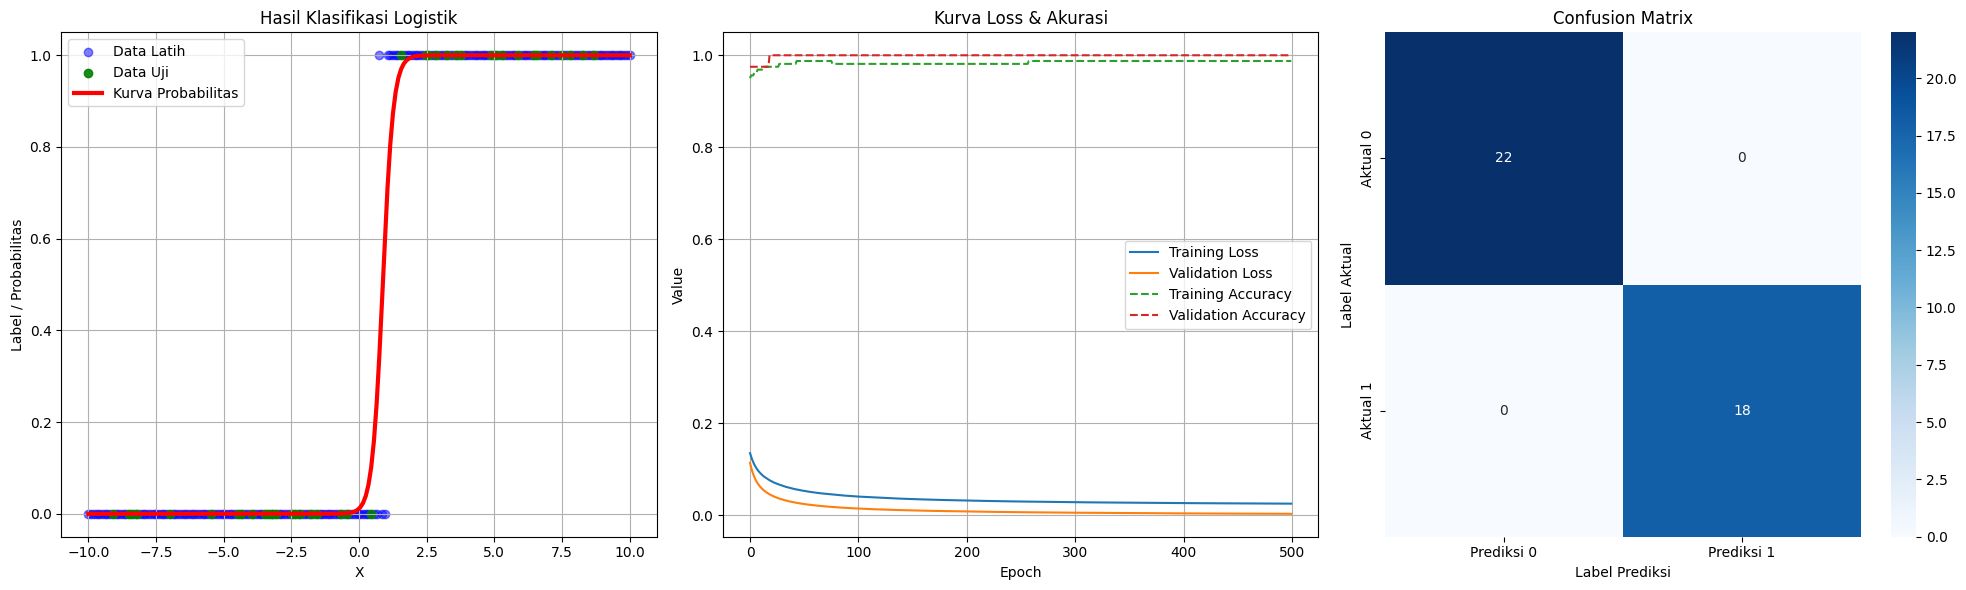

In [17]:

plt.figure(figsize=(20, 6))

# Plot 1: Hasil Klasifikasi
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, label='Data Latih', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Data Uji', color='green', alpha=0.9)
# Plot kurva probabilitas (sigmoid)
sorted_indices = np.argsort(X_data.flatten())
plt.plot(X_data[sorted_indices], model.predict(X_data[sorted_indices]), color='red', linewidth=3, label='Kurva Probabilitas')
plt.title("Hasil Klasifikasi Logistik")
plt.xlabel("X")
plt.ylabel("Label / Probabilitas")
plt.legend()
plt.grid(True)

# Plot 2: Kurva Loss & Akurasi
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Kurva Loss & Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot 3: Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi 0', 'Prediksi 1'], yticklabels=['Aktual 0', 'Aktual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')

plt.tight_layout()
plt.show()